In [2]:
from osgeo import gdal
import numpy as np
import matplotlib.pyplot as plt

In [4]:
red=gdal.Open(r"C:\Users\Ahammad Sahil\Desktop\SEM 2\GA LAB\nikil\satelite\landsat08\landsat 8\LC08_L1TP_144053_20210214_20210304_01_T1\LC08_L1TP_144053_20210214_20210304_01_T1_B4.TIF")
green=gdal.Open(r"C:\Users\Ahammad Sahil\Desktop\SEM 2\GA LAB\nikil\satelite\landsat08\landsat 8\LC08_L1TP_144053_20210214_20210304_01_T1\LC08_L1TP_144053_20210214_20210304_01_T1_B3.TIF")
blue=gdal.Open(r"C:\Users\Ahammad Sahil\Desktop\SEM 2\GA LAB\nikil\satelite\landsat08\landsat 8\LC08_L1TP_144053_20210214_20210304_01_T1\LC08_L1TP_144053_20210214_20210304_01_T1_B2.TIF")
nir=gdal.Open(r"C:\Users\Ahammad Sahil\Desktop\SEM 2\GA LAB\nikil\satelite\landsat08\landsat 8\LC08_L1TP_144053_20210214_20210304_01_T1\LC08_L1TP_144053_20210214_20210304_01_T1_B5.TIF")

In [5]:
red_array=red.ReadAsArray()
red_array

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint16)

In [30]:
green_array=green.ReadAsArray()
blue_array=blue.ReadAsArray()
nir_array=nir.ReadAsArray()

In [16]:
gt=red.GetGeoTransform()#to get the boundary extend of the raster data
gt

(567885.0, 30.0, 0.0, 1234815.0, 0.0, -30.0)

In [8]:
#projection
projection=red.GetProjection()
projection

'PROJCS["WGS 84 / UTM zone 43N",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",75],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","32643"]]'

In [10]:
#dimension
width=red.RasterXSize  #no.of coloums
width

7561

In [11]:
height=red.RasterYSize  #no.of rows
height

7721

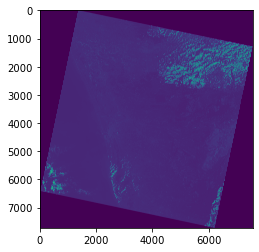

In [13]:
plt.figure()
plt.imshow(red_array)

In [26]:
file_list=[nir_array,red_array,green_array]
driver=gdal.GetDriverByName("GTiff")
#driver.Create---tocreate a blank data set which is used for saving the result
new_raster = driver.Create(r"C:\Users\Ahammad Sahil\Desktop\SEM 2\GA JUPTR_NB\anju\module_2b support\new_raster_gdal_1.tiff",
                         width,height,3,eType=gdal.GDT_Int16)
new_raster.SetGeoTransform(gt)
new_raster.SetProjection(projection)
for image,i in enumerate(file_list,1):
    new_raster.GetRasterBand(image).WriteArray(i)
    new_raster.GetRasterBand(image).SetNoDataValue(np.nan)
new_raster.FlushCache()# to complete the saving process of  raster array into the disk

In [ ]:
what is the use of flush_cache?
completeing of saving 
height= ds.RasterYSize
width= ds.RasterXsixe
count=ds.RasterCount #get no. of bands
array=ds.ReadAsArray()
meta=ds.GetMetadata()
area calculation---.area
geodataframe.Sjoin
skypy
